In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno
import warnings
warnings.filterwarnings('ignore')

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/weather-dataset-rattle-package/weatherAUS.csv


In [2]:
rain = pd.read_csv("../input/weather-dataset-rattle-package/weatherAUS.csv")
rain.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [3]:
print(rain.shape)
print(rain.info())
print(rain.describe())
print(rain.columns)

(145460, 23)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       8

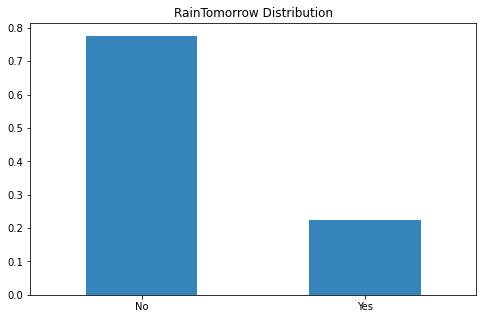

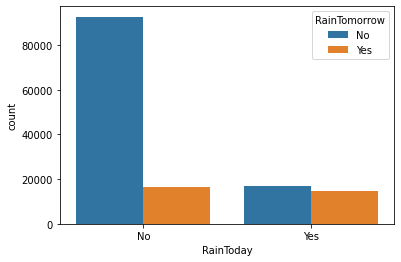

In [4]:
#EDA
fig = plt.figure(figsize = (8,5))
rain.RainTomorrow.value_counts(normalize = True).plot(kind='bar', alpha = 0.9, rot=0)
plt.title('RainTomorrow Distribution')
plt.show()

sns.countplot(x='RainToday', hue='RainTomorrow',data=rain)
plt.show()

rain['RainToday'].replace({'No': 0, 'Yes': 1},inplace = True)
rain['RainTomorrow'].replace({'No': 0, 'Yes': 1},inplace = True)

categorical features:
['Date', 'Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm'] 

numerical features:
['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm', 'RainToday', 'RainTomorrow']


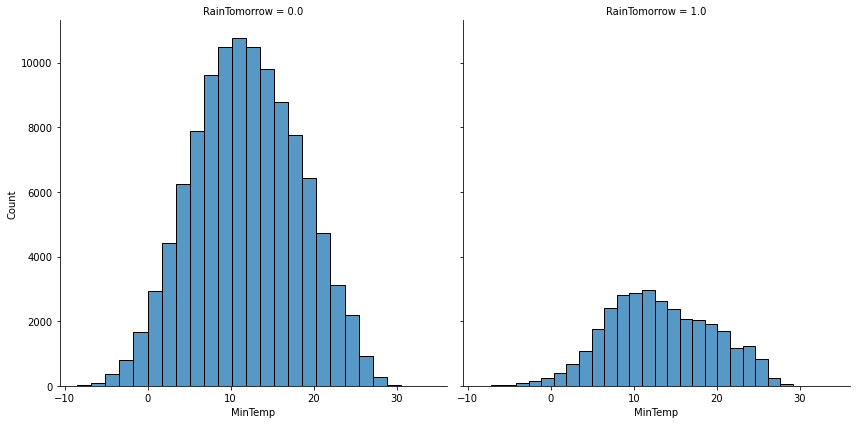

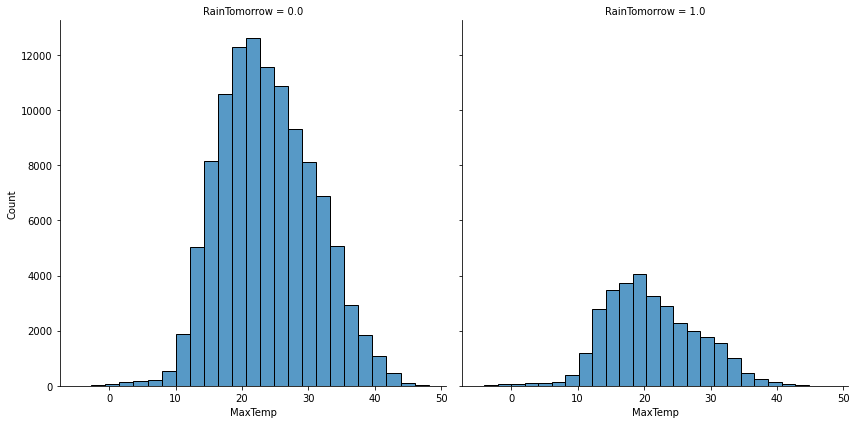

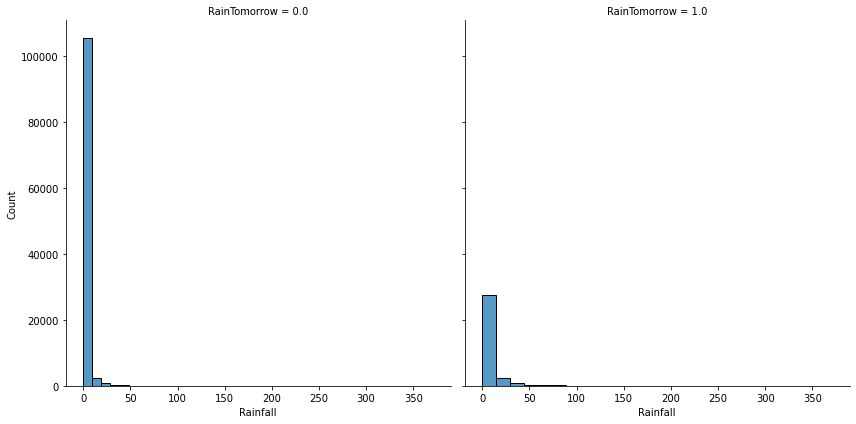

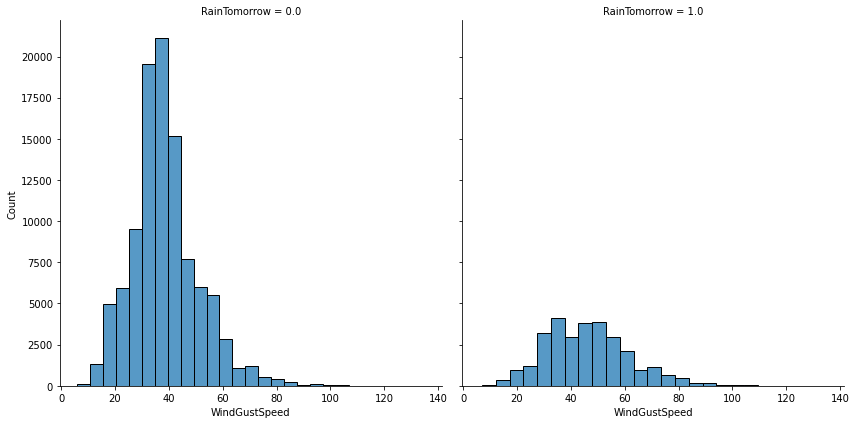

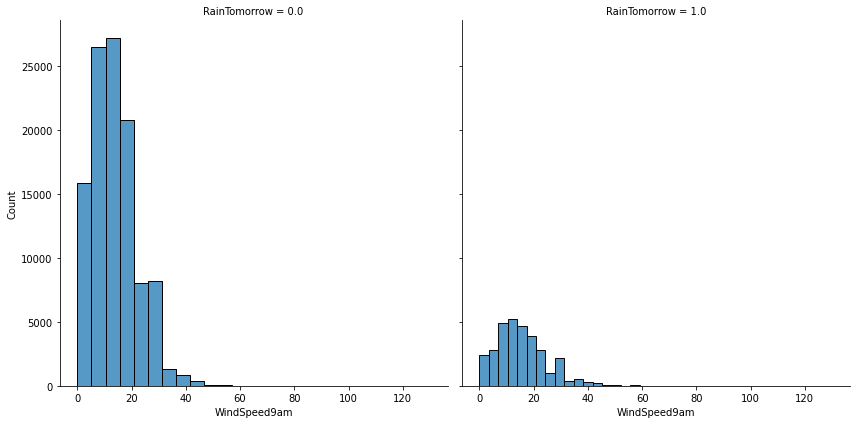

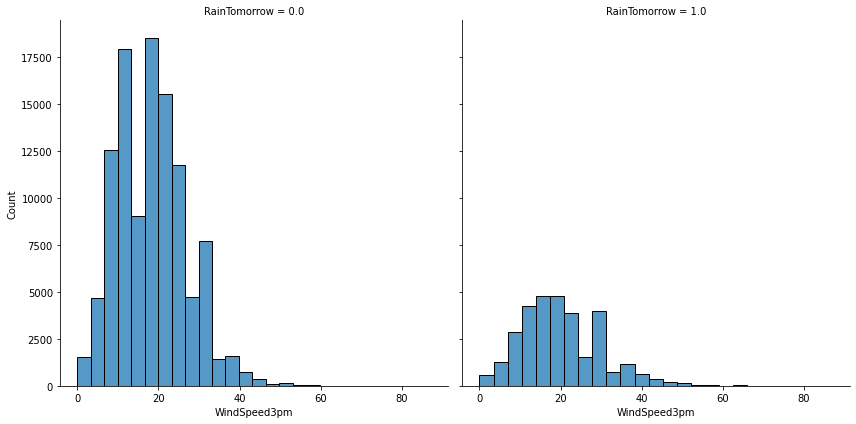

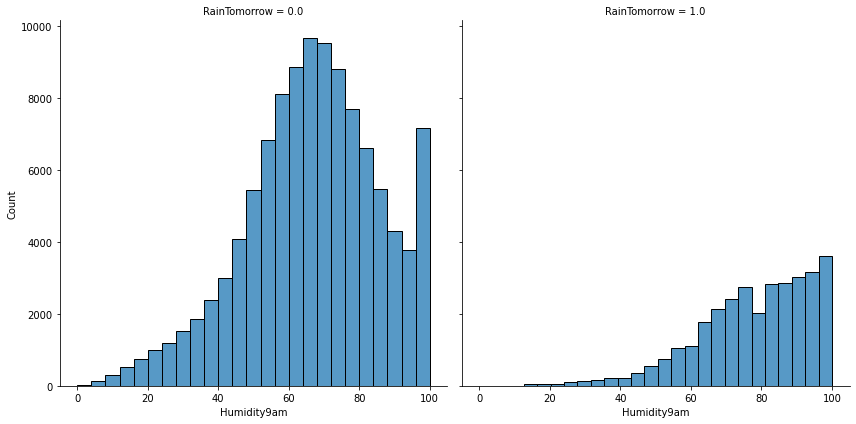

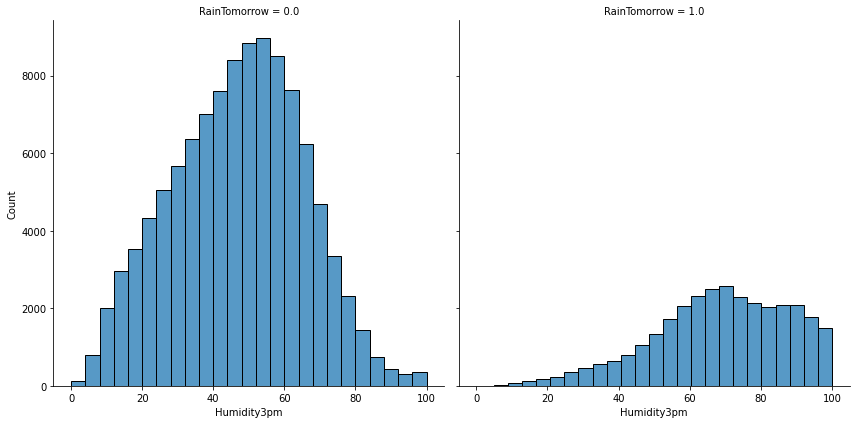

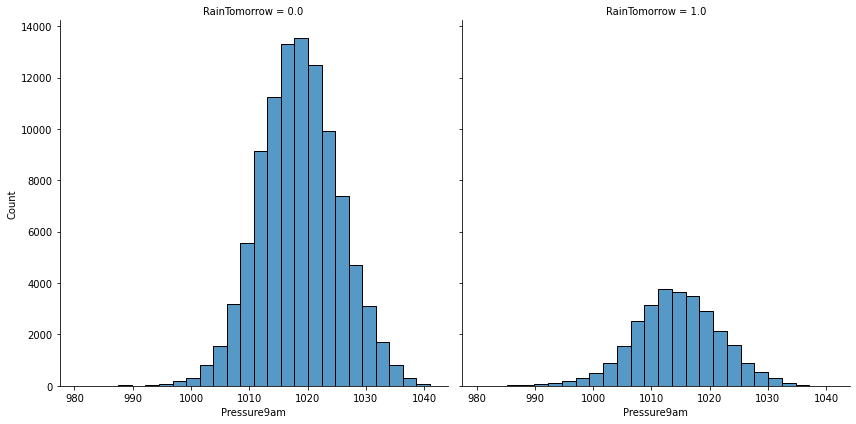

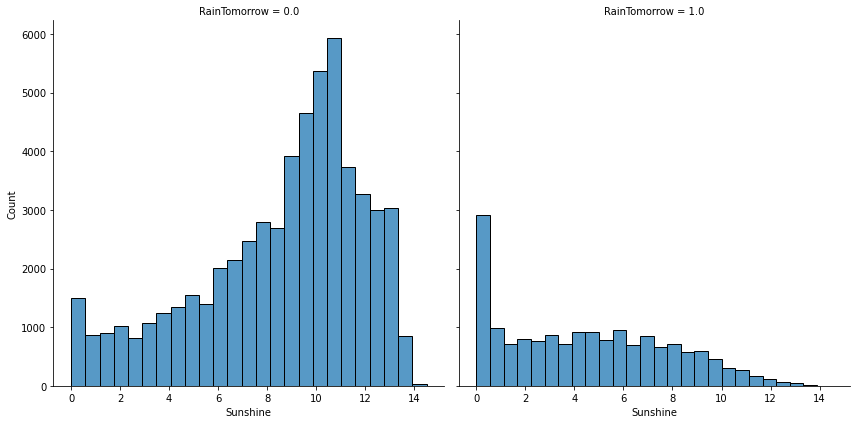

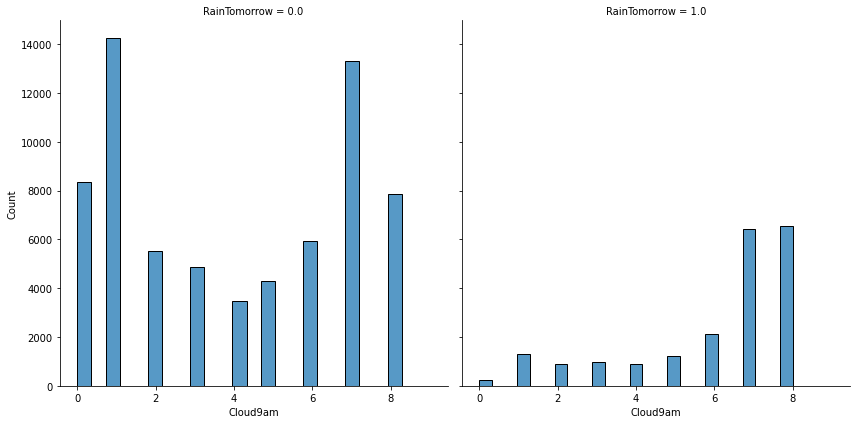

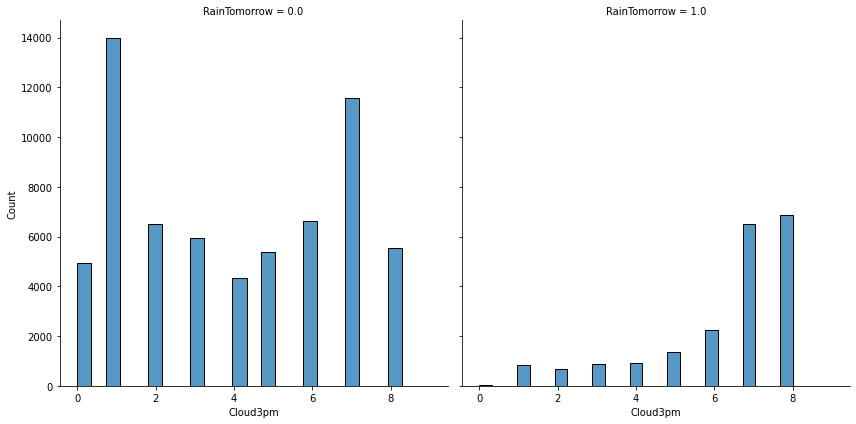

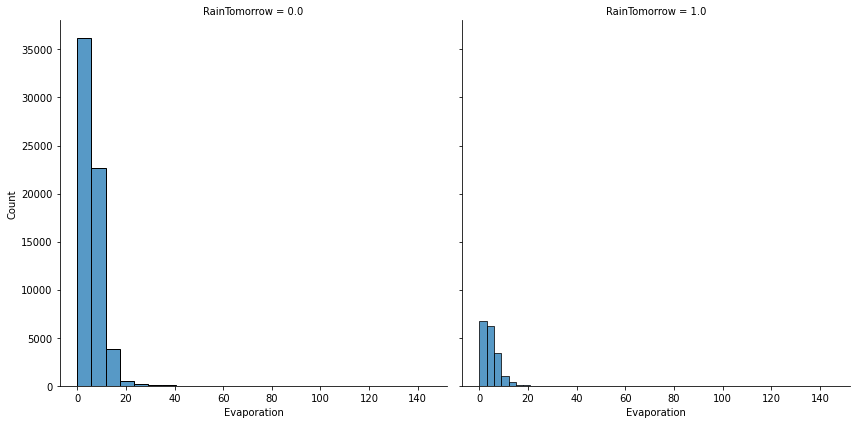

In [5]:
#remove samples with Nan label
rain.dropna(how='all', subset=['RainTomorrow'], inplace=True)

num_features=[col for col in rain.columns if rain[col].dtypes !='O']
cat_features=[col for col in rain.columns if col not in num_features]
print("categorical features:\n{}".format(cat_features),"\n")
print("numerical features:\n{}".format(num_features))

for k in ['MinTemp', 'MaxTemp', 'Rainfall', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Sunshine', 'Cloud9am', 'Cloud3pm', 'Evaporation']:
    c=sns.FacetGrid(data=rain,col="RainTomorrow",height=6)
    c.map(sns.histplot, k, bins=25)
    plt.show()


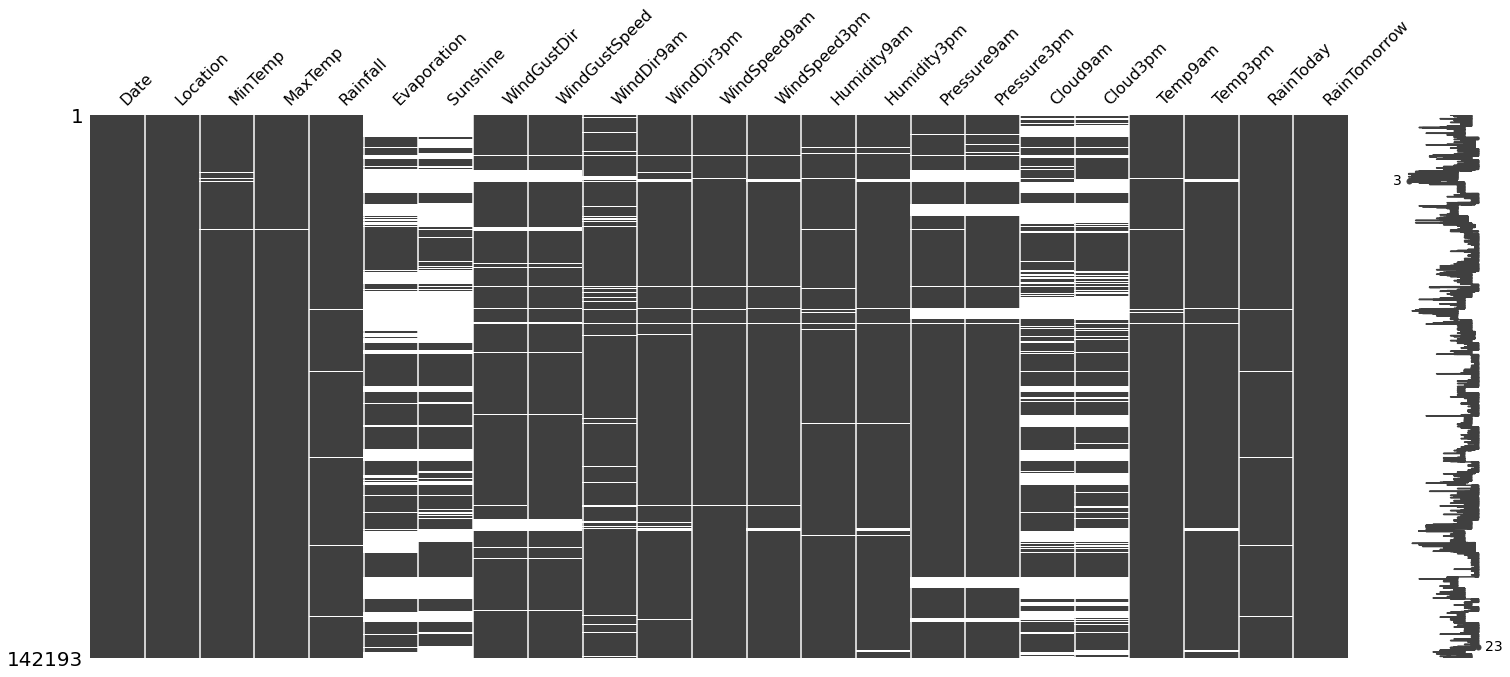

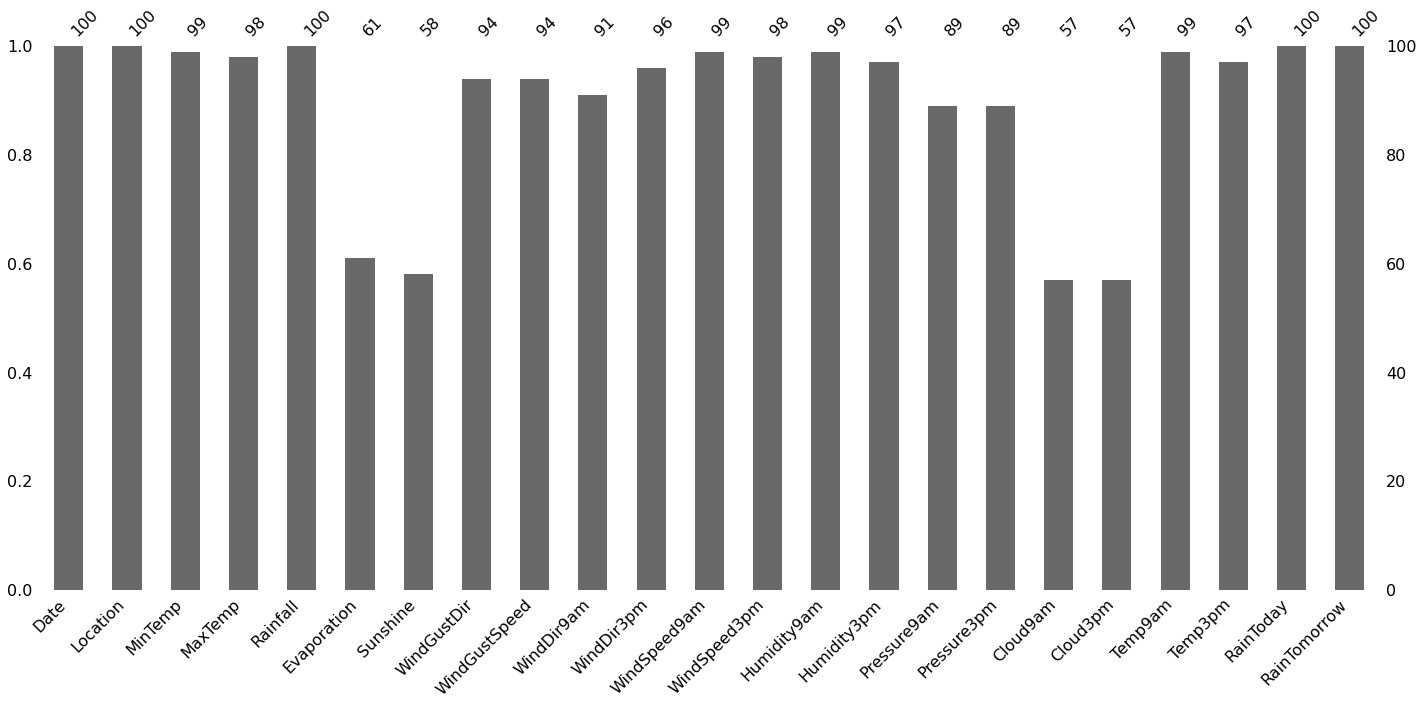

features contain NaN values:['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm', 'RainToday']
MinTemp          0.004480
MaxTemp          0.002265
Rainfall         0.009888
Evaporation      0.427890
Sunshine         0.476929
WindGustDir      0.065615
WindGustSpeed    0.065193
WindDir9am       0.070418
WindDir3pm       0.026570
WindSpeed9am     0.009480
WindSpeed3pm     0.018496
Humidity9am      0.012476
Humidity3pm      0.025388
Pressure9am      0.098556
Pressure3pm      0.098324
Cloud9am         0.377353
Cloud3pm         0.401525
Temp9am          0.006358
Temp3pm          0.019171
RainToday        0.009888
dtype: float64
               no.of missing values  % missing_values
Date                              0               0.0
Location                          0               0.0
Mi

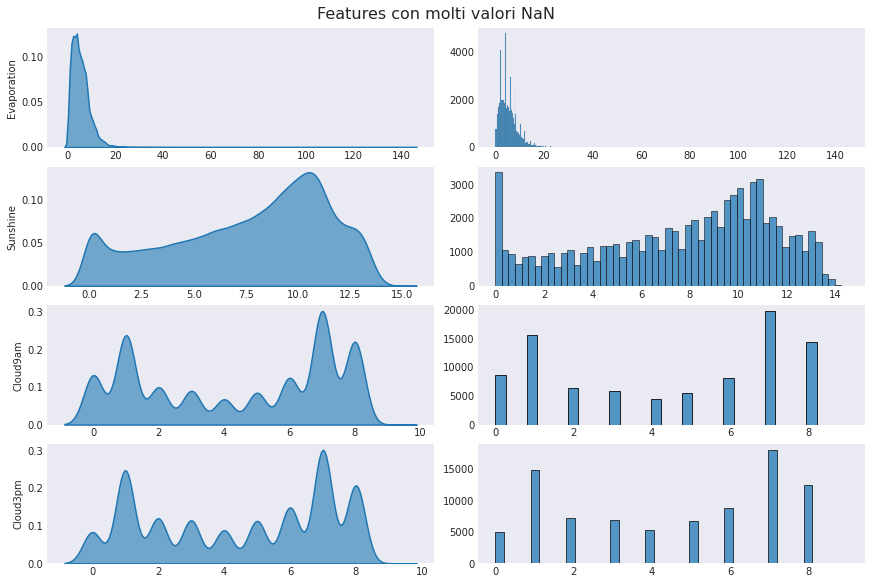

(142193, 23)


In [6]:
#search for Nan values
msno.matrix(rain)
plt.show()
msno.bar(rain.sample(100))
plt.show()
nanFeatures=[col for col in rain.columns if rain[col].isnull().any()]
print("features contain NaN values:{}".format(nanFeatures))
print(rain[nanFeatures].isnull().mean())

missing = pd.DataFrame(rain.isnull().sum(),columns = ['no.of missing values'])

missing['% missing_values']= (missing/len(rain)).round(2)*100
print(missing)

cols = ['Evaporation', 'Sunshine', 'Cloud9am', 'Cloud3pm']
plt.style.use('seaborn-dark')
fig, ax = plt.subplots(4, 2, figsize=(12, 8), constrained_layout=True)
for i, num_var in enumerate(cols):
    sns.kdeplot(data=rain, x=num_var, ax=ax[i][0],
                fill=True, alpha=0.6, linewidth=1.5)
    ax[i][0].set_ylabel(num_var)
    ax[i][0].set_xlabel(None)
    sns.histplot(data=rain, x=num_var, ax=ax[i][1])
    ax[i][1].set_ylabel(None)
    ax[i][1].set_xlabel(None)
fig.suptitle('Features con molti valori NaN', size=16);
plt.show()
print(rain.shape)

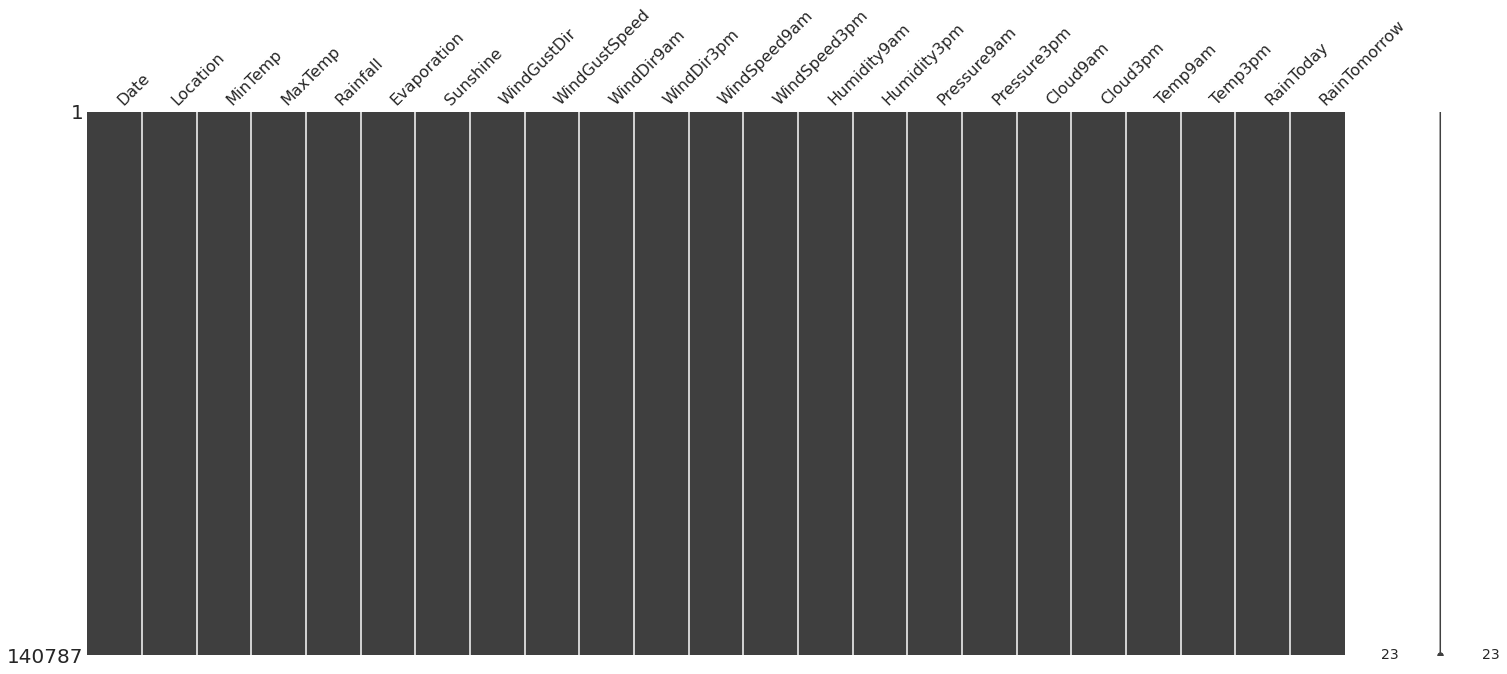

In [7]:
#NaN value management
rain.dropna(how='all', subset=['RainToday'], inplace=True)
rain['Evaporation']=rain['Evaporation'].fillna(rain['Evaporation'].mean())
rain['MinTemp']=rain['MinTemp'].fillna(rain['MinTemp'].median())
rain['MaxTemp']=rain['MaxTemp'].fillna(rain['MaxTemp'].median())
rain['Rainfall']=rain['Rainfall'].fillna(rain['Rainfall'].median())
rain['Sunshine']=rain['Sunshine'].fillna(rain['Sunshine'].median())
rain['WindGustSpeed']=rain['WindGustSpeed'].fillna(rain['WindGustSpeed'].median())
rain['WindSpeed9am']=rain['WindSpeed9am'].fillna(rain['WindSpeed9am'].median())
rain['WindSpeed3pm']=rain['WindSpeed3pm'].fillna(rain['WindSpeed3pm'].median())
rain['Humidity9am']=rain['Humidity9am'].fillna(rain['Humidity9am'].median())
rain['Humidity3pm']=rain['Humidity3pm'].fillna(rain['Humidity3pm'].median())
rain['Pressure9am']=rain['Pressure9am'].fillna(rain['Pressure9am'].median())
rain['Pressure3pm']=rain['Pressure3pm'].fillna(rain['Pressure3pm'].median())
rain['Cloud9am']=rain['Cloud9am'].fillna(rain['Cloud9am'].median())
rain['Cloud3pm']=rain['Cloud3pm'].fillna(rain['Cloud3pm'].median())
rain['Temp9am']=rain['Temp9am'].fillna(rain['Temp9am'].median())
rain['Temp3pm']=rain['Temp3pm'].fillna(rain['Temp3pm'].median())
rain['WindDir9am'] = rain['WindDir9am'].fillna(rain['WindDir9am'].mode()[0])
rain['WindGustDir'] = rain['WindGustDir'].fillna(rain['WindGustDir'].mode()[0])
rain['WindDir3pm'] = rain['WindDir3pm'].fillna(rain['WindDir3pm'].mode()[0])

msno.matrix(rain)
plt.show()

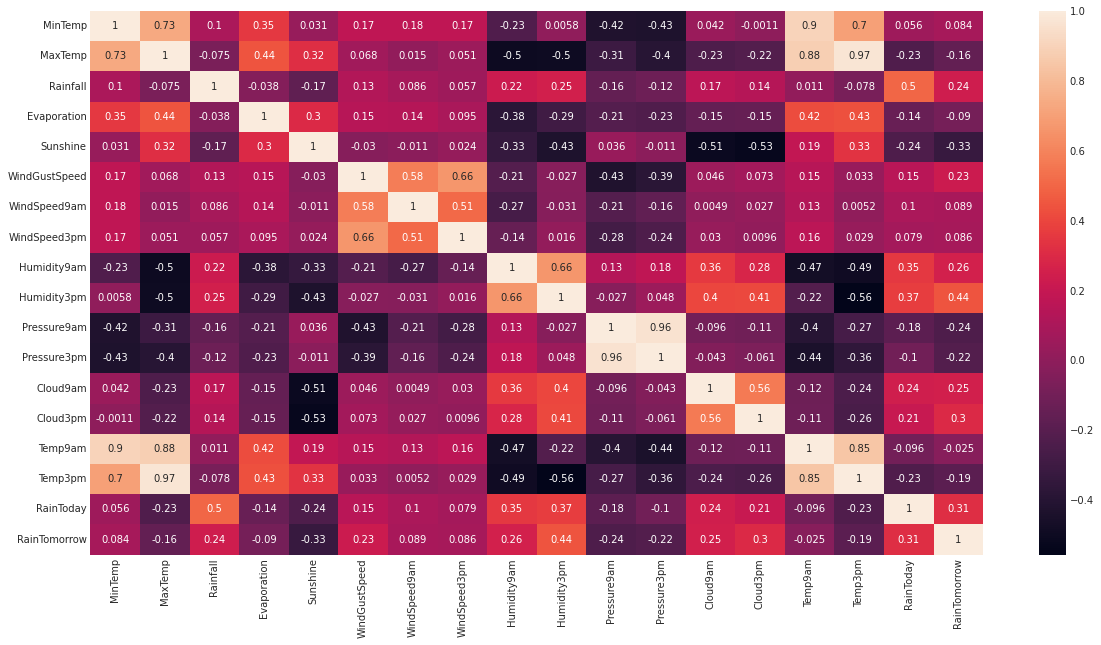

In [8]:
#correlation
plt.figure(figsize=(20,10))
sns.heatmap(rain.corr(), annot = True)
plt.show()

In [9]:
# multicolinearity
def correlation(df, threshold):
    col_corr = set()  # names of correlated columns
    corr_matrix = df.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold:
                colname = corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr
print(correlation(rain[num_features], 0.8))
plt.close()

{'Temp3pm', 'Pressure3pm', 'Temp9am'}


In [10]:
rain.drop(['Temp3pm', 'Pressure3pm', 'Temp9am'], axis=1, inplace=True)

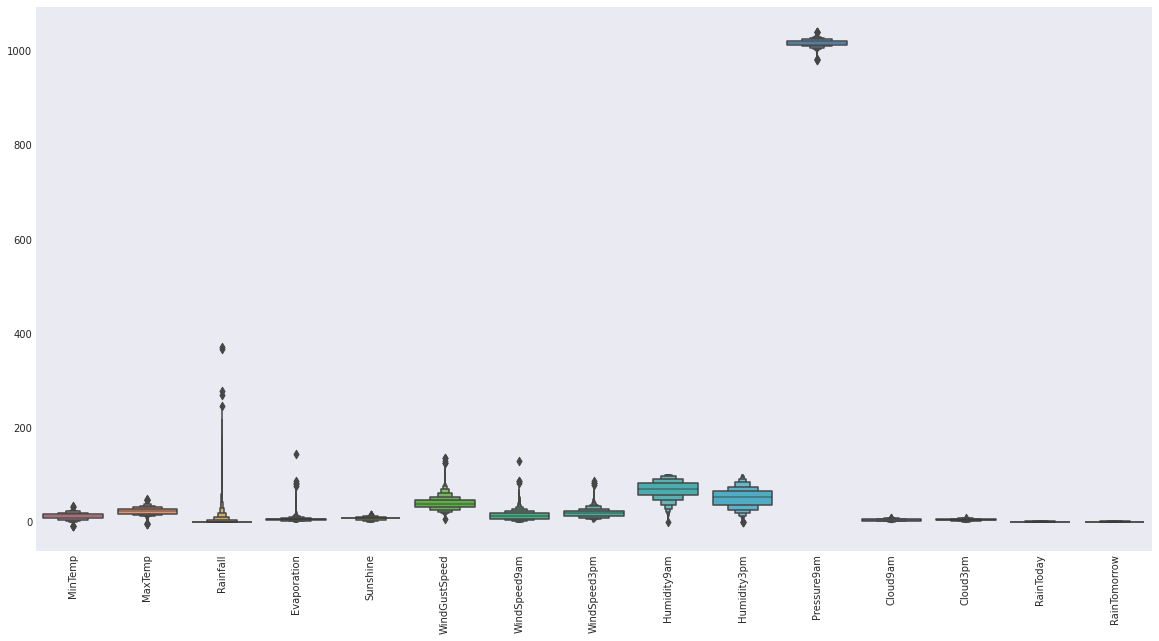

(140787, 20)


In [11]:
#Serach for Outliers
plt.close()
plt.figure(figsize=(20,10))
plt.style.use('seaborn-dark')
sns.boxenplot(data = rain )
plt.xticks(rotation=90)
plt.show()
print(rain.shape)

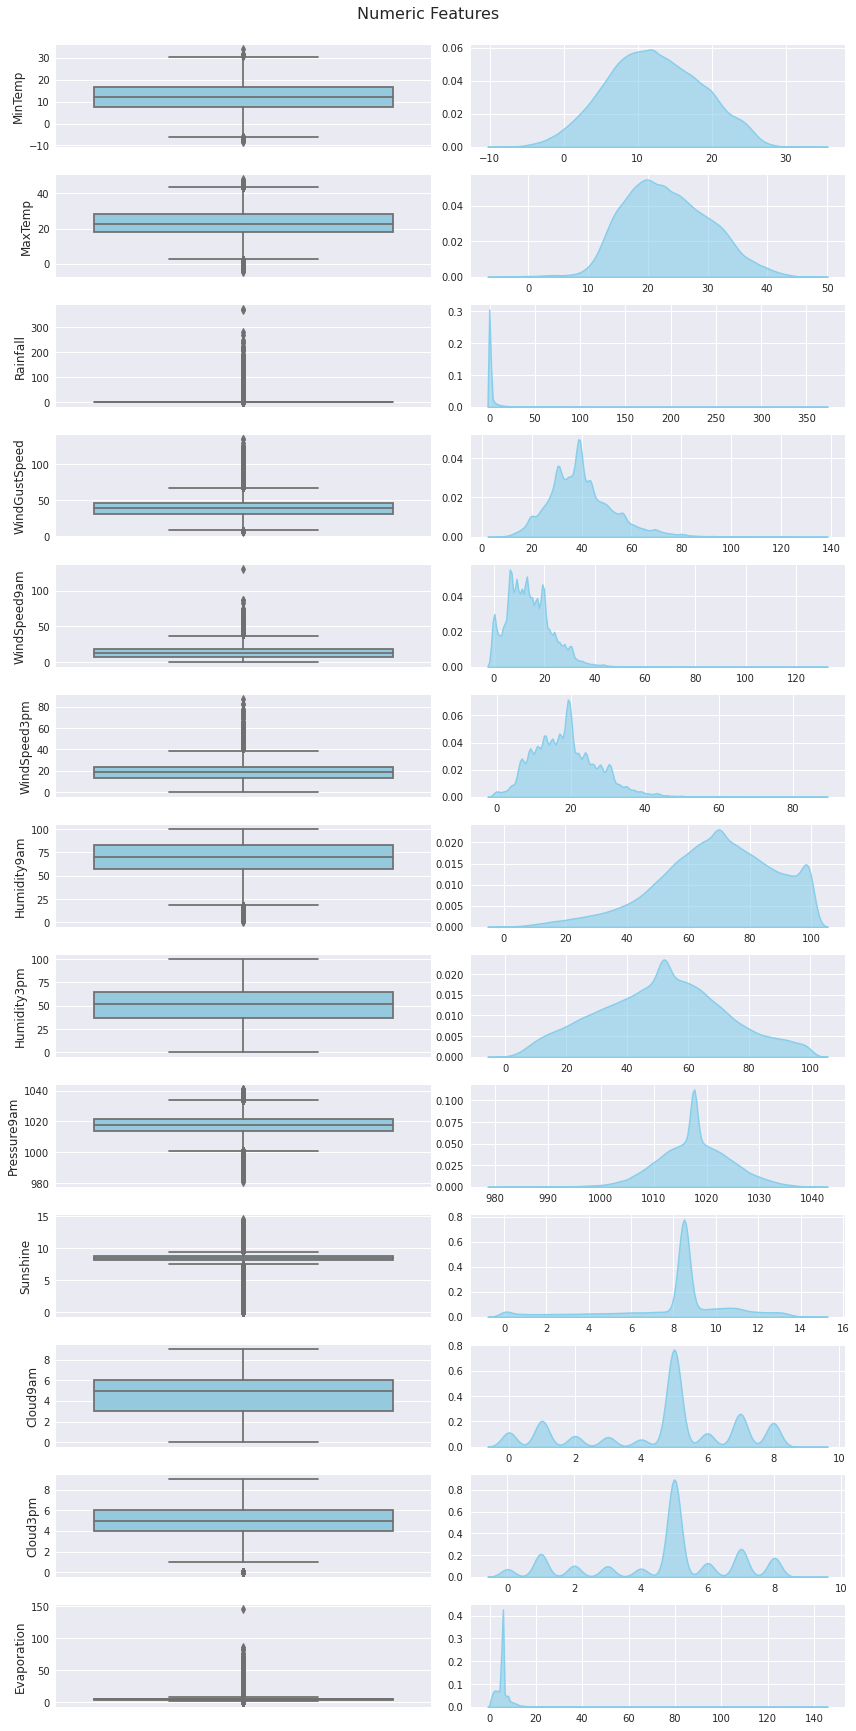

In [12]:
plt.style.use('seaborn')
fig, axis = plt.subplots(13, 2, figsize=(12, 24))
for i, num_var in enumerate(['MinTemp', 'MaxTemp', 'Rainfall', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Sunshine', 'Cloud9am', 'Cloud3pm', 'Evaporation']):
    sns.boxplot(y=num_var, data=rain, ax=axis[i][0], color='skyblue')
    sns.kdeplot(x=num_var, data=rain, ax=axis[i][1], color='skyblue',
                fill=True, alpha=0.6, linewidth=1.5)
    axis[i][0].set_ylabel(f"{num_var}", fontsize=12)
    axis[i][0].set_xlabel(None)
    axis[i][1].set_xlabel(None)
    axis[i][1].set_ylabel(None)
fig.suptitle('Numeric Features', fontsize=16, y=1)
plt.tight_layout()
plt.show()

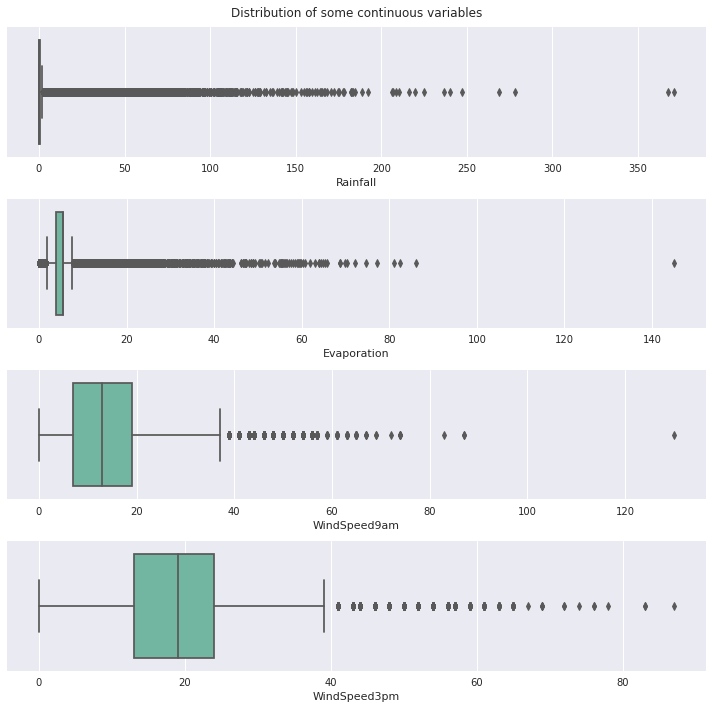

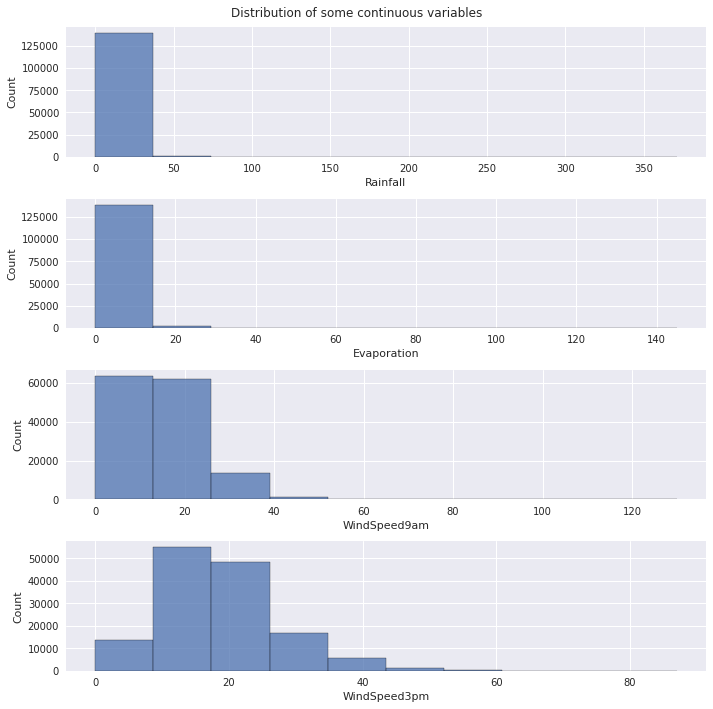

In [13]:
fig, axes = plt.subplots(4,1, figsize=(10, 10), sharey=False)
fig.suptitle('Distribution of some continuous variables')

sns.boxplot(x= 'Rainfall', data = rain, palette = 'Set2', ax = axes[0])
axes[0].set_title("")
sns.boxplot(x= 'Evaporation', data = rain, palette = 'Set2', ax = axes[1])
axes[1].set_title("")
sns.boxplot(x= 'WindSpeed9am', data = rain, palette = 'Set2', ax = axes[2])
axes[2].set_title("")
sns.boxplot(x= 'WindSpeed3pm', data = rain, palette = 'Set2', ax = axes[3])
axes[3].set_title("")
plt.tight_layout()
plt.show()

fig, axes = plt.subplots(4,1, figsize=(10, 10), sharey=False)
fig.suptitle('Distribution of some continuous variables')


sns.histplot(x= 'Rainfall', data = rain, palette = 'Set2', ax = axes[0], bins = 10)
axes[0].set_title("")
sns.histplot(x= 'Evaporation', data = rain, palette = 'Set2', ax = axes[1], bins = 10)
axes[1].set_title("")
sns.histplot(x= 'WindSpeed9am', data = rain, palette = 'Set2', ax = axes[2], bins = 10)
axes[2].set_title("")
sns.histplot(x= 'WindSpeed3pm', data = rain, palette = 'Set2', ax = axes[3], bins = 10)
axes[3].set_title("")
plt.tight_layout()
plt.show()

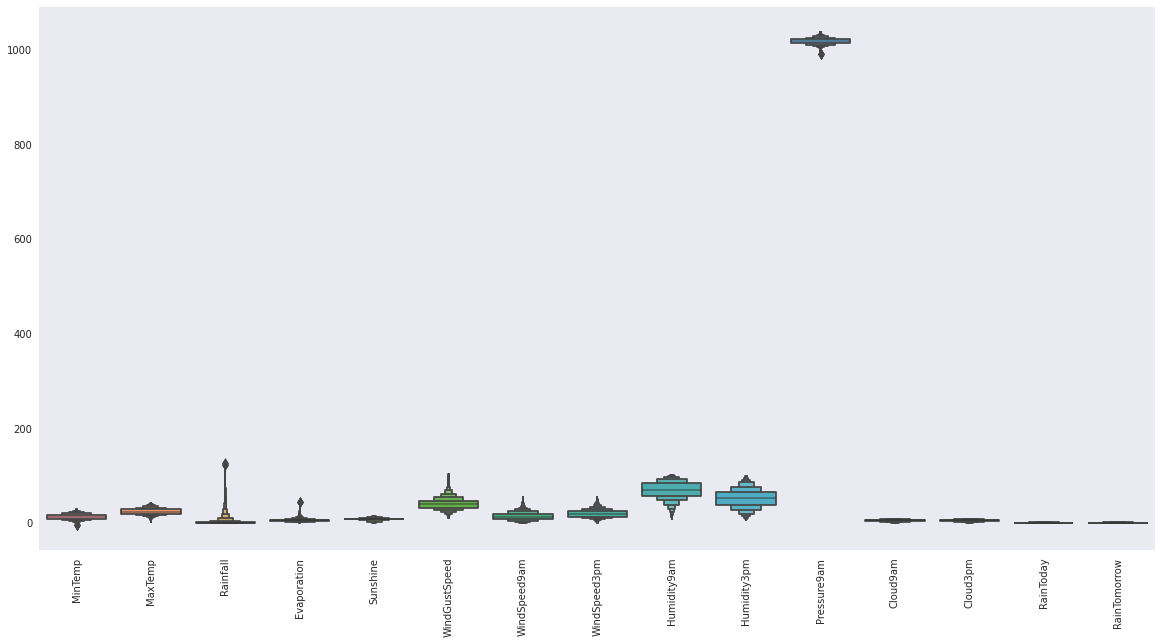

In [14]:
#remove outliers
threshold = 0.0005
for col in ['MinTemp', 'MaxTemp', 'Rainfall', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Sunshine', 'Cloud9am', 'Cloud3pm', 'Evaporation']:

    lower_threshold = rain[col].quantile(threshold)
    upper_threshold = rain[col].quantile(1 - threshold)

    rain = rain[(rain[col] >= lower_threshold) & (rain[col] <= upper_threshold)]

plt.figure(figsize=(20,10))
plt.style.use('seaborn-dark')
sns.boxenplot(data = rain )
plt.xticks(rotation=90)
plt.show()

In [15]:
#Date management
rain['Date'] = pd.to_datetime(rain['Date'])
rain['Day'] = rain['Date'].dt.day
rain['Month'] = rain['Date'].dt.month
rain['Year'] = rain['Date'].dt.year
rain.drop("Date",axis=1,inplace=True)


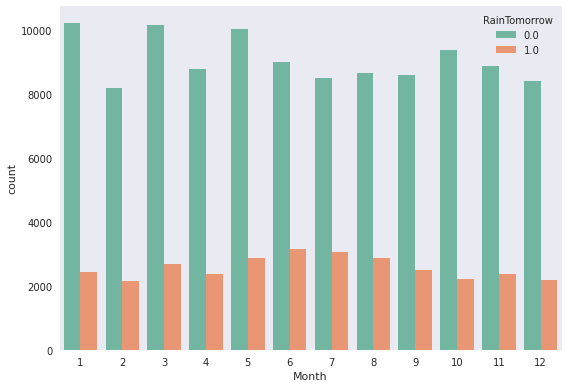

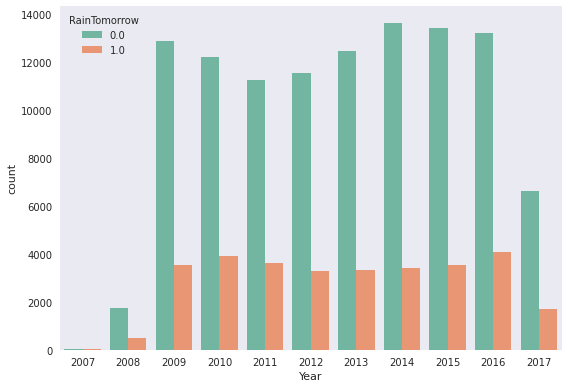

In [16]:
sns.countplot(x='Month',hue='RainTomorrow',data=rain, palette='Set2')
plt.tight_layout()
plt.show()
sns.countplot(x='Year',hue='RainTomorrow',data=rain, palette='Set2')
plt.tight_layout()
plt.show()

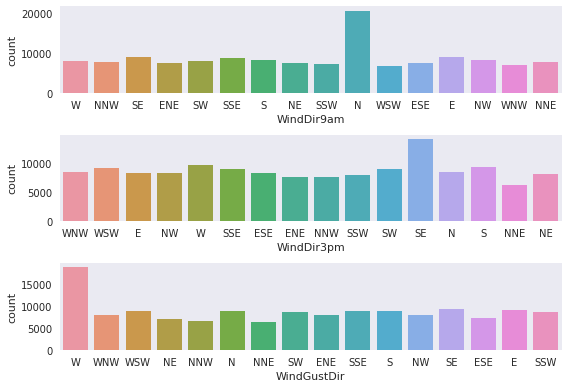

<Figure size 720x720 with 0 Axes>

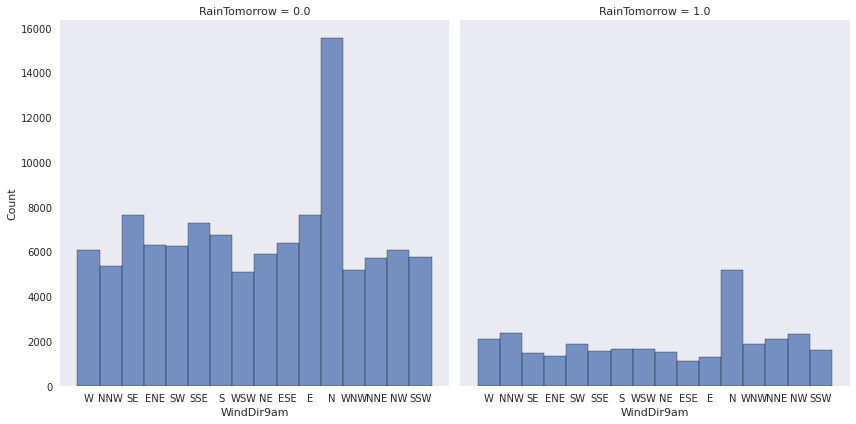

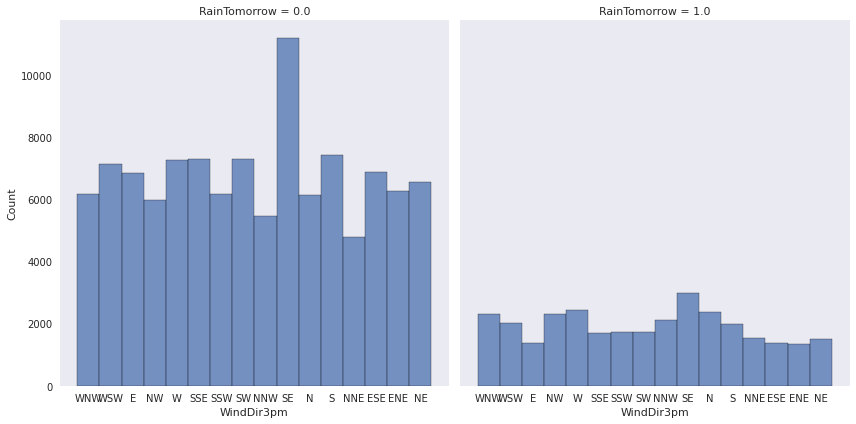

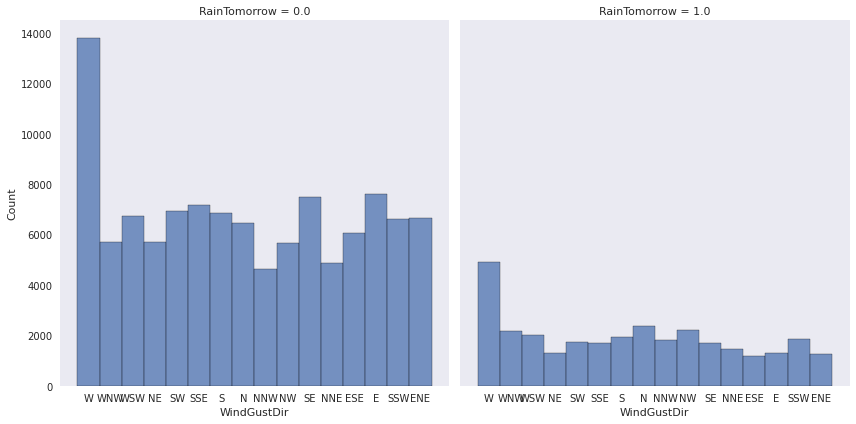

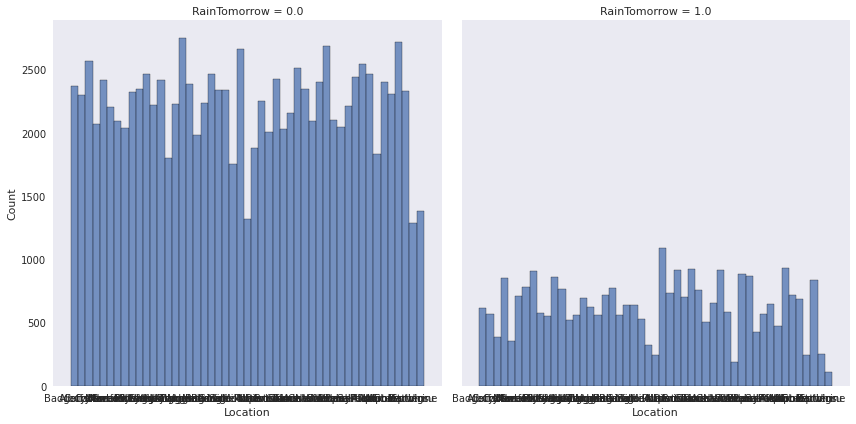

(139872, 22)


In [17]:
#windDir visualization
fig, ax =plt.subplots(3,1)
plt.figure(figsize=(10,10))
sns.countplot(data=rain,x='WindDir9am',ax=ax[0])
sns.countplot(data=rain,x='WindDir3pm',ax=ax[1])
sns.countplot(data=rain,x='WindGustDir',ax=ax[2])
fig.tight_layout()
plt.show()

for i in ['WindDir9am','WindDir3pm','WindGustDir','Location']:
    c = sns.FacetGrid(data=rain, col="RainTomorrow", height=6)
    c.map(sns.histplot, i, bins=25)
    plt.show()
print(rain.shape)

In [18]:
print(rain.corr().abs()['RainTomorrow'].sort_values(ascending = False))

RainTomorrow     1.000000
Humidity3pm      0.441240
Sunshine         0.324555
RainToday        0.311208
Cloud3pm         0.295847
Humidity9am      0.255317
Rainfall         0.253633
Cloud9am         0.247929
Pressure9am      0.234197
WindGustSpeed    0.222305
MaxTemp          0.157216
Evaporation      0.093396
WindSpeed9am     0.086483
MinTemp          0.086466
WindSpeed3pm     0.082973
Year             0.012679
Month            0.007414
Day              0.004558
Name: RainTomorrow, dtype: float64


In [19]:
rain.drop("Day",axis=1,inplace=True)
rain.drop("Year",axis=1,inplace=True)
rain.drop("WindDir9am",axis=1,inplace=True)


In [20]:
rain = pd.get_dummies(rain, drop_first = True).reset_index(drop = True)

In [21]:
#remove label
t=rain['RainTomorrow']
X=rain.drop(['RainTomorrow'], axis=1)

In [22]:
#Split the dataset in Training and Test Set
from sklearn.model_selection import train_test_split
X_traintot, X_test, t_traintot, t_test = train_test_split(X, t, test_size = 0.2, random_state = 0)
print(X_traintot.shape)
print(X_test.shape)
print(rain.shape)

(111897, 93)
(27975, 93)
(139872, 94)


In [23]:
#Normalization
print(X_traintot.describe())
cols = X_traintot.columns
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_traintot = scaler.fit_transform(X_traintot)
X_test = scaler.transform(X_test)
X_traintot = pd.DataFrame(X_traintot, columns=[cols])
X_test = pd.DataFrame(X_test, columns=[cols])


             MinTemp        MaxTemp       Rainfall    Evaporation  \
count  111897.000000  111897.000000  111897.000000  111897.000000   
mean       12.171947      23.212660       2.267269       5.430576   
std         6.357712       7.043749       7.483490       2.916070   
min        -5.900000      -0.100000       0.000000       0.000000   
25%         7.600000      17.900000       0.000000       4.000000   
50%        12.000000      22.600000       0.000000       5.472516   
75%        16.800000      28.200000       0.800000       5.472516   
max        28.600000      44.400000     126.400000      43.400000   

            Sunshine  WindGustSpeed   WindSpeed9am   WindSpeed3pm  \
count  111897.000000  111897.000000  111897.000000  111897.000000   
mean        8.038569      39.804409      13.933206      18.589846   
std         2.771965      12.943168       8.753969       8.622893   
min         0.000000       9.000000       0.000000       0.000000   
25%         8.200000      31.0000

In [24]:
#Split Training set in Validation set, Development set and a new Training set
X_tr, X_val, t_tr, t_val = train_test_split(X_traintot,t_traintot,test_size= 0.08, random_state=0)
X_training, X_dev, t_training, t_dev = train_test_split(X_tr,t_tr,test_size=0.07,random_state=0)

In [25]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, recall_score, roc_auc_score, precision_score, f1_score, classification_report
from sklearn.model_selection import GridSearchCV, RepeatedStratifiedKFold

In [26]:
#Model Selection Logistic Regression
'''
logRegTrain_cv = LogisticRegression()
solvers=['newton-cg','lbfgs','liblinear']
penalty=['l1','l2']
c_values=[10,5,1.0,0.1,0.05]

# Define grid search
grid=dict(solver=solvers,penalty=penalty, C=c_values)
cv=RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=logRegTrain_cv, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(X_training, t_training)
# Results
print("Best parameters) ",grid_result.best_params_)
print("Model accuracy :",grid_result.best_score_)
'''

'\nlogRegTrain_cv = LogisticRegression()\nsolvers=[\'newton-cg\',\'lbfgs\',\'liblinear\']\npenalty=[\'l1\',\'l2\']\nc_values=[10,5,1.0,0.1,0.05]\n\n# Define grid search\ngrid=dict(solver=solvers,penalty=penalty, C=c_values)\ncv=RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)\ngrid_search = GridSearchCV(estimator=logRegTrain_cv, param_grid=grid, n_jobs=-1, cv=cv, scoring=\'accuracy\',error_score=0)\ngrid_result = grid_search.fit(X_training, t_training)\n# Results\nprint("Best parameters) ",grid_result.best_params_)\nprint("Model accuracy :",grid_result.best_score_)\n'

In [27]:
#Training 
logreg = LogisticRegression(solver='liblinear', random_state=0)
logreg.fit(X_training, t_training)
t_pred_train = logreg.predict(X_training)
t_pred_train_prob = logreg.predict_proba(X_training)
t_pred_train
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(t_training, t_pred_train)))
print(classification_report(t_training,t_pred_train))
cm = confusion_matrix(t_training, t_pred_train)
print('Confusion matrix\n\n', cm)
print('\nTrue Positives(TP) = ', cm[0,0])
print('\nTrue Negatives(TN) = ', cm[1,1])
print('\nFalse Positives(FP) = ', cm[0,1])
print('\nFalse Negatives(FN) = ', cm[1,0])

Training-set accuracy score: 0.8487
              precision    recall  f1-score   support

         0.0       0.87      0.95      0.91     74483
         1.0       0.73      0.51      0.60     21255

    accuracy                           0.85     95738
   macro avg       0.80      0.73      0.75     95738
weighted avg       0.84      0.85      0.84     95738

Confusion matrix

 [[70460  4023]
 [10459 10796]]

True Positives(TP) =  70460

True Negatives(TN) =  10796

False Positives(FP) =  4023

False Negatives(FN) =  10459


In [28]:
#KNN
from sklearn.neighbors import KNeighborsClassifier

In [29]:
#Model Selection KNN
'''
knn = KNeighborsClassifier()
param_grid = {'n_neighbors': np.arange(3, 50)}
#Model selection knn
knn_gscv = GridSearchCV(knn, param_grid, cv=5)
knn_gscv.fit(X_train,t_train)
bestknn=knn_gscv.best_params_
print(bestknn)
'''

"\nknn = KNeighborsClassifier()\nparam_grid = {'n_neighbors': np.arange(3, 50)}\n#Model selection knn\nknn_gscv = GridSearchCV(knn, param_grid, cv=5)\nknn_gscv.fit(X_train,t_train)\nbestknn=knn_gscv.best_params_\nprint(bestknn)\n"

In [30]:
#Training
knn= KNeighborsClassifier(n_neighbors=7)
knn.fit(X_training,t_training)
pred = knn.predict(X_training)
print(classification_report(t_training,pred))
cm = confusion_matrix(t_training, pred)
print('Confusion matrix\n\n', cm)
print('\nTrue Positives(TP) = ', cm[0,0])
print('\nTrue Negatives(TN) = ', cm[1,1])
print('\nFalse Positives(FP) = ', cm[0,1])
print('\nFalse Negatives(FN) = ', cm[1,0])

              precision    recall  f1-score   support

         0.0       0.86      0.96      0.91     74483
         1.0       0.76      0.46      0.57     21255

    accuracy                           0.85     95738
   macro avg       0.81      0.71      0.74     95738
weighted avg       0.84      0.85      0.83     95738

Confusion matrix

 [[71421  3062]
 [11528  9727]]

True Positives(TP) =  71421

True Negatives(TN) =  9727

False Positives(FP) =  3062

False Negatives(FN) =  11528


In [31]:
#Logistic Regression test on Development Set
t_dev_log = logreg.predict(X_dev)
t_dev_log_prob = logreg.predict_proba(X_dev)
print(logreg.predict_proba(X_dev)[0:10, 1])
print('Accuracy Logistic Regression sul Development Set: {0:0.4f}'. format(accuracy_score(t_dev, t_dev_log)))
print(classification_report(t_dev,t_dev_log))
cm = confusion_matrix(t_dev, t_dev_log)
print('Confusion matrix Logistic Regression:\n\n', cm)
print('\nTrue Positives(TP) = ', cm[0,0])
print('\nTrue Negatives(TN) = ', cm[1,1])
print('\nFalse Positives(FP) = ', cm[0,1])
print('\nFalse Negatives(FN) = ', cm[1,0])
#KNN test on Development Set
t_dev_knn = knn.predict(X_dev)
t_dev_knn_proba = knn.predict_proba(X_dev)
print(knn.predict_proba(X_dev)[0:10, 1])
print('Accuracy KNN sul Development Set: {0:0.4f}'. format(accuracy_score(t_dev, t_dev_knn)))
print(classification_report(t_dev,t_dev_knn))
cm = confusion_matrix(t_dev, t_dev_knn)
print('Confusion matrix Logistic Regression:\n\n', cm)
print('\nTrue Positives(TP) = ', cm[0,0])
print('\nTrue Negatives(TN) = ', cm[1,1])
print('\nFalse Positives(FP) = ', cm[0,1])
print('\nFalse Negatives(FN) = ', cm[1,0])

[0.17256931 0.54066541 0.95039    0.32747843 0.07131437 0.75297096
 0.08890512 0.11624568 0.09646514 0.04633575]
Accuracy Logistic Regression sul Development Set: 0.8476
              precision    recall  f1-score   support

         0.0       0.87      0.94      0.91      5668
         1.0       0.70      0.50      0.58      1539

    accuracy                           0.85      7207
   macro avg       0.79      0.72      0.74      7207
weighted avg       0.84      0.85      0.84      7207

Confusion matrix Logistic Regression:

 [[5345  323]
 [ 775  764]]

True Positives(TP) =  5345

True Negatives(TN) =  764

False Positives(FP) =  323

False Negatives(FN) =  775
[0.28571429 0.28571429 0.71428571 0.71428571 0.         0.14285714
 0.         0.28571429 0.14285714 0.14285714]
Accuracy KNN sul Development Set: 0.8125
              precision    recall  f1-score   support

         0.0       0.84      0.94      0.89      5668
         1.0       0.60      0.36      0.45      1539

    acc

In [32]:
#Model Selection 2 Logistic Regression
'''
threshold = [0.2,0.25,0.3,0.35,0.4,0.45,0.5,0.55]
for i in threshold:
    preds = np.where(logreg.predict_proba(X_val)[:, 1] > i, 1, 0)
    pd.DataFrame(data=[accuracy_score(t_val, preds), recall_score(t_val, preds), precision_score(t_val, preds),roc_auc_score(t_val, preds)], index=["accuracy", "recall", "precision", "roc_auc_score"])
    print('Threshold: {0:0.2f}'.format(i))
    print('Model accuracy score: {0:0.4f}'.format(accuracy_score(t_val, preds)))
    cm = confusion_matrix(t_val, preds)
    print('Confusion matrix\n', cm)
    print('Recall: {0:0.4f}'.format(recall_score(t_val, preds)))
    print('Precision: {0:0.4f}'.format(precision_score(t_val, preds)))
    print('F1-Score: {0:0.4f}'.format(f1_score(t_val, preds)))
'''

'\nthreshold = [0.2,0.25,0.3,0.35,0.4,0.45,0.5,0.55]\nfor i in threshold:\n    preds = np.where(logreg.predict_proba(X_val)[:, 1] > i, 1, 0)\n    pd.DataFrame(data=[accuracy_score(t_val, preds), recall_score(t_val, preds), precision_score(t_val, preds),roc_auc_score(t_val, preds)], index=["accuracy", "recall", "precision", "roc_auc_score"])\n    print(\'Threshold: {0:0.2f}\'.format(i))\n    print(\'Model accuracy score: {0:0.4f}\'.format(accuracy_score(t_val, preds)))\n    cm = confusion_matrix(t_val, preds)\n    print(\'Confusion matrix\n\', cm)\n    print(\'Recall: {0:0.4f}\'.format(recall_score(t_val, preds)))\n    print(\'Precision: {0:0.4f}\'.format(precision_score(t_val, preds)))\n    print(\'F1-Score: {0:0.4f}\'.format(f1_score(t_val, preds)))\n'

In [33]:
#Final training 
logreg.fit(X_traintot, t_traintot)
t_pred_train = np.where(logreg.predict_proba(X_traintot)[:, 1] > 0.35, 1, 0)
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(t_traintot, t_pred_train)))
print(classification_report(t_traintot,t_pred_train))
cm = confusion_matrix(t_traintot, t_pred_train)
print('Confusion matrix\n\n', cm)
print('\nTrue Positives(TP) = ', cm[0,0])
print('\nTrue Negatives(TN) = ', cm[1,1])
print('\nFalse Positives(FP) = ', cm[0,1])
print('\nFalse Negatives(FN) = ', cm[1,0])

Training-set accuracy score: 0.8366
              precision    recall  f1-score   support

         0.0       0.90      0.89      0.89     87147
         1.0       0.63      0.64      0.63     24750

    accuracy                           0.84    111897
   macro avg       0.76      0.77      0.76    111897
weighted avg       0.84      0.84      0.84    111897

Confusion matrix

 [[77751  9396]
 [ 8893 15857]]

True Positives(TP) =  77751

True Negatives(TN) =  15857

False Positives(FP) =  9396

False Negatives(FN) =  8893


In [34]:
#Test
t_pred_test = np.where(logreg.predict_proba(X_test)[:, 1] > 0.35, 1, 0)

t_pred_test_prob = logreg.predict_proba(X_test)

t_pred_test_prob[:,1]
print('Model accuracy su dati test: {0:0.4f}'. format(accuracy_score(t_test, t_pred_test)))

cm = confusion_matrix(t_test, t_pred_test)

print('Confusion matrix\n\n', cm)

print('\nTrue Positives(TP) = ', cm[0,0])

print('\nTrue Negatives(TN) = ', cm[1,1])

print('\nFalse Positives(FP) = ', cm[0,1])

print('\nFalse Negatives(FN) = ', cm[1,0])


print(classification_report(t_test, t_pred_test))

Model accuracy su dati test: 0.8341
Confusion matrix

 [[19453  2372]
 [ 2270  3880]]

True Positives(TP) =  19453

True Negatives(TN) =  3880

False Positives(FP) =  2372

False Negatives(FN) =  2270
              precision    recall  f1-score   support

         0.0       0.90      0.89      0.89     21825
         1.0       0.62      0.63      0.63      6150

    accuracy                           0.83     27975
   macro avg       0.76      0.76      0.76     27975
weighted avg       0.84      0.83      0.83     27975

